In [2]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean

# B3D Only: Outwash module set to false

In [3]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [4]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  27

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  99

Text(0, 0.5, 'shoreline position')

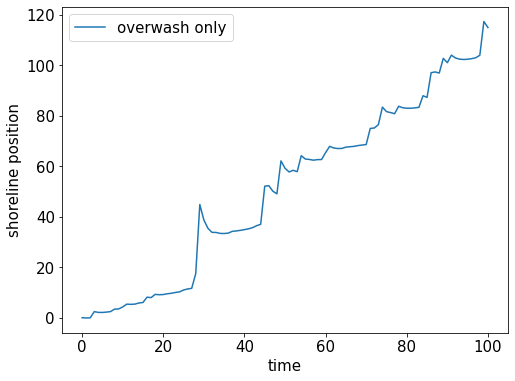

In [5]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

In [83]:
# interior
initial_domain = cascade_b3d_only.barrier3d[0]._DomainTS[0]
domain1 = cascade_b3d_only.barrier3d[0]._DomainTS[1]
domain9 = cascade_b3d_only.barrier3d[0]._DomainTS[9]
domain10 = cascade_b3d_only.barrier3d[0]._DomainTS[10]
domain11 = cascade_b3d_only.barrier3d[0]._DomainTS[11]
domain20 = cascade_b3d_only.barrier3d[0]._DomainTS[20]
domain40 = cascade_b3d_only.barrier3d[0]._DomainTS[40]
domain60 = cascade_b3d_only.barrier3d[0]._DomainTS[60]
domain80 = cascade_b3d_only.barrier3d[0]._DomainTS[80]
# dunes
initial_dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[0]) + cascade_b3d_only.barrier3d[0].BermEl
dune_domain1 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[1])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain9 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[9])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain10 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[10])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain11 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[11])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain20 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[20])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain40 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[40])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain60 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[60])+ cascade_b3d_only.barrier3d[0].BermEl
dune_domain80 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[80])+ cascade_b3d_only.barrier3d[0].BermEl
# full domains
intial_full = np.vstack([initial_dunes, initial_domain])
full_domain1 = np.vstack([dune_domain1, domain1])
full_domain9 = np.vstack([dune_domain9, domain9])
full_domain10 = np.vstack([dune_domain10, domain10])
full_domain11 = np.vstack([dune_domain11, domain11])
full_domain20 = np.vstack([dune_domain20, domain20])
full_domain40 = np.vstack([dune_domain40, domain40])
full_domain60 = np.vstack([dune_domain60, domain60])
full_domain80 = np.vstack([dune_domain80, domain80])

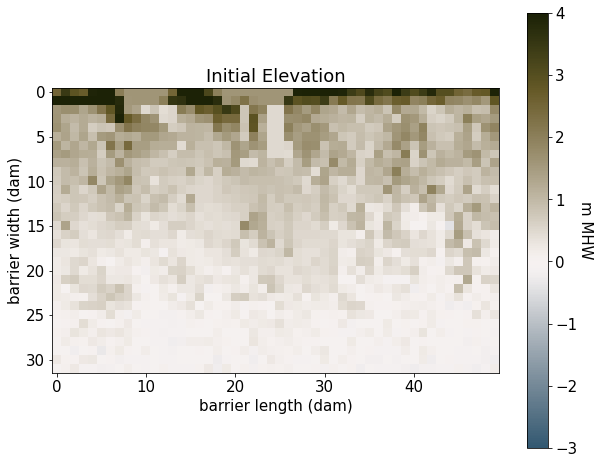

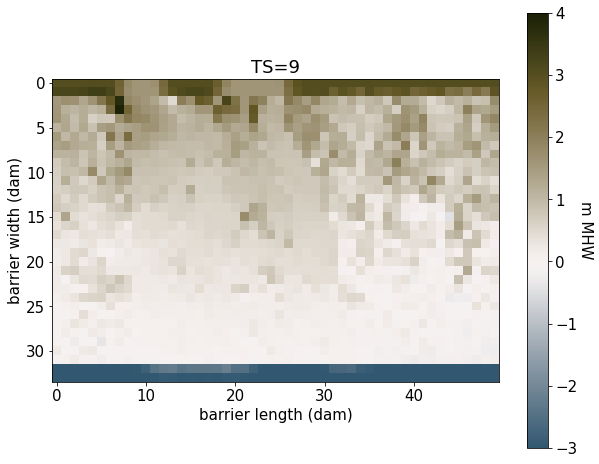

In [95]:
minelev = -3
maxelev = 4
step = 0.1
cmap = cmocean.cm.diff
cmapadjusted = cmocean.tools.crop(cmap,minelev,maxelev,0)
levels = np.arange(minelev,maxelev,step)

# plotting intial
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    intial_full*10,
    cmap=cmapadjusted,
    vmin=-3, vmax=4.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting domain 9
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain9[:, :]*10,
    cmap=cmapadjusted,
    vmin=-3, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=9")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

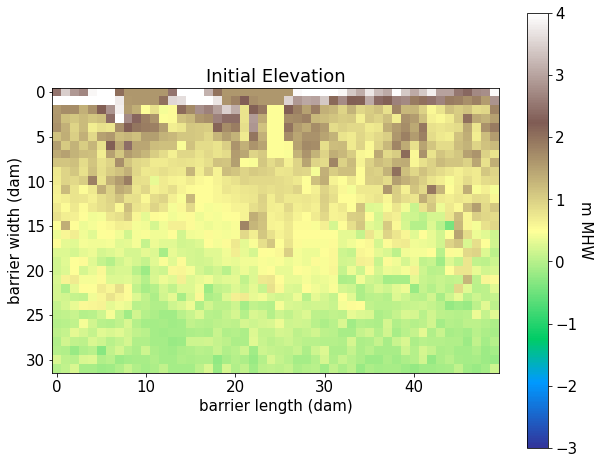

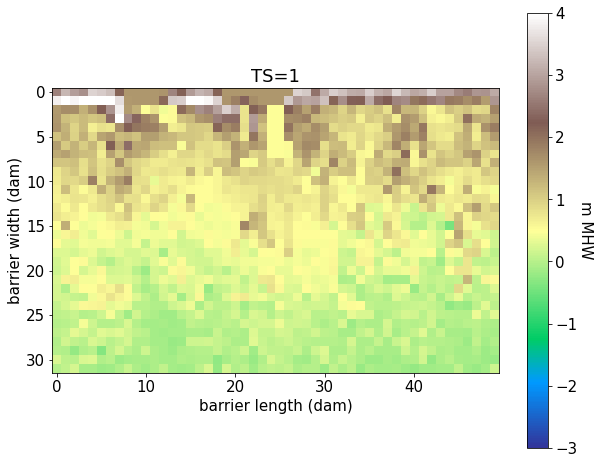

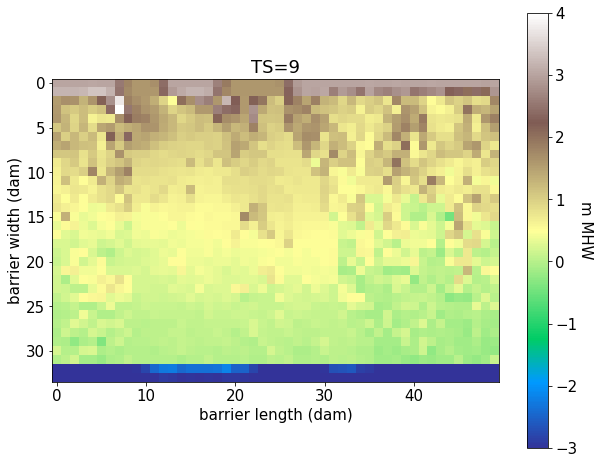

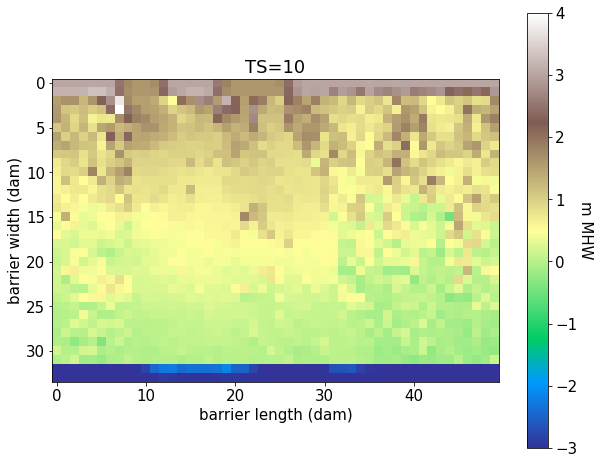

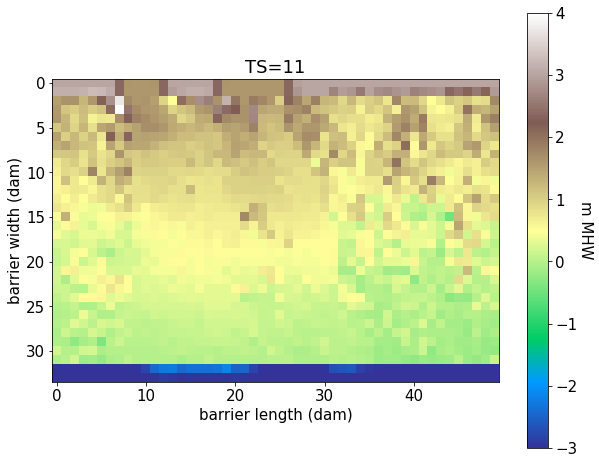

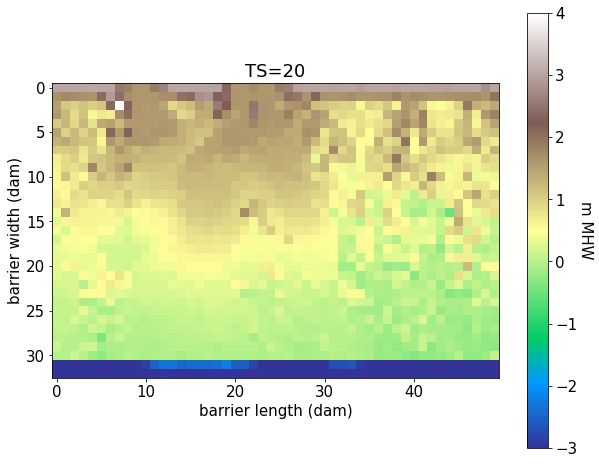

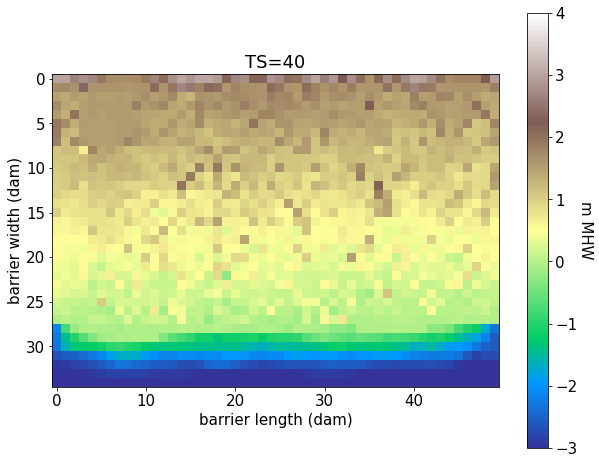

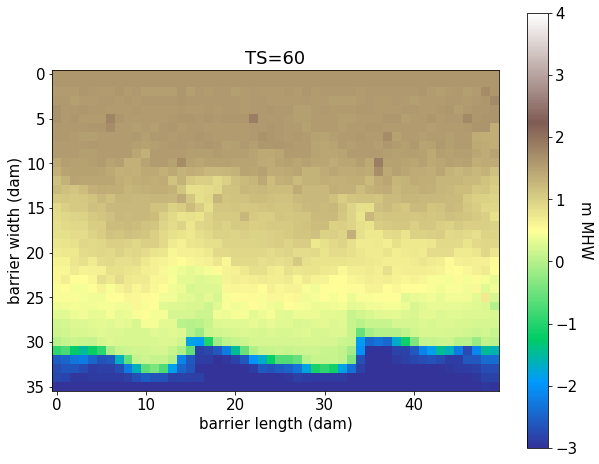

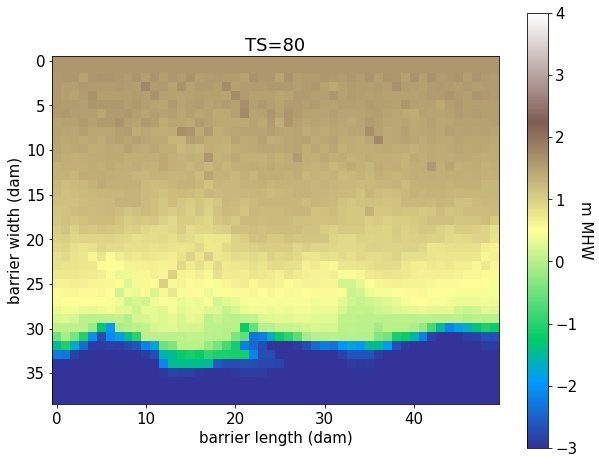

In [85]:
# plotting intial
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    intial_full*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting domain 1
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain1[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=1")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 9
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain9[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=9")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 10
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain10[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=10")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 11
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain11[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=11")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 20
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain20[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=20")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 40
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain40[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=40")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 60
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain60[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=60")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 80
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain80[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=80")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# Outwash every 10 years

In [8]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [9]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

 Time Step:  9Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
O

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
O

Text(0, 0.5, 'shoreline position')

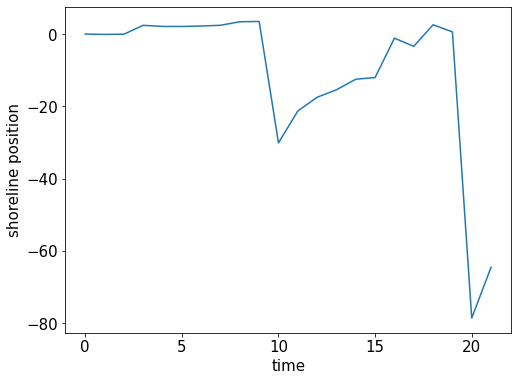

In [10]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


In [33]:
cascade_outwash100.barrier3d[0].BermEl

0.154

In [32]:
# initial_domain = cascade_outwash100.outwash[0]._initial_full_domain
# final_domain = cascade_outwash100.outwash[0]._full_domain

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     initial_domain*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     final_domain*10,
#     cmap="terrain",
#     vmin=min_v, vmax=max_v,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()

In [60]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams.update({"font.size": 15})

# interiors 
initial_domain = cascade_outwash100.barrier3d[0]._DomainTS[0]
domain9 = cascade_outwash100.barrier3d[0]._DomainTS[9]
domain10 = cascade_outwash100.barrier3d[0]._DomainTS[10]
domain11 = cascade_outwash100.barrier3d[0]._DomainTS[11]

domain19 = cascade_outwash100.barrier3d[0]._DomainTS[19]
domain20 = cascade_outwash100.barrier3d[0]._DomainTS[20]
domain21 = cascade_outwash100.barrier3d[0]._DomainTS[21]

domain29 = cascade_outwash100.barrier3d[0]._DomainTS[29]
domain30 = cascade_outwash100.barrier3d[0]._DomainTS[30]
# domain31 = cascade_outwash100.barrier3d[0]._DomainTS[31]

# dunes
initial_dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[0])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain9 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[9])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain10 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[10])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain11 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[11])+ cascade_outwash100.barrier3d[0].BermEl

dune_domain19 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[19])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain20 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[20])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain21 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[21])+ cascade_outwash100.barrier3d[0].BermEl

dune_domain29 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[29])+ cascade_outwash100.barrier3d[0].BermEl
dune_domain30 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[30])+ cascade_outwash100.barrier3d[0].BermEl
# dune_domain11 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[11])


# full domains
intial_full = np.vstack([initial_dunes, initial_domain])
full_domain9 = np.vstack([dune_domain9, domain9])
full_domain10 = np.vstack([dune_domain10, domain10])
full_domain11 = np.vstack([dune_domain11, domain11])

full_domain19 = np.vstack([dune_domain19, domain19])
full_domain20 = np.vstack([dune_domain20, domain20])
# full_domain21 = np.vstack([dune_domain21, domain21])

# full_domain29 = np.vstack([dune_domain29, domain29])
# full_domain30 = np.vstack([dune_domain30, domain30])
# full_domain9 = np.vstack([dune_domain9, domain9])

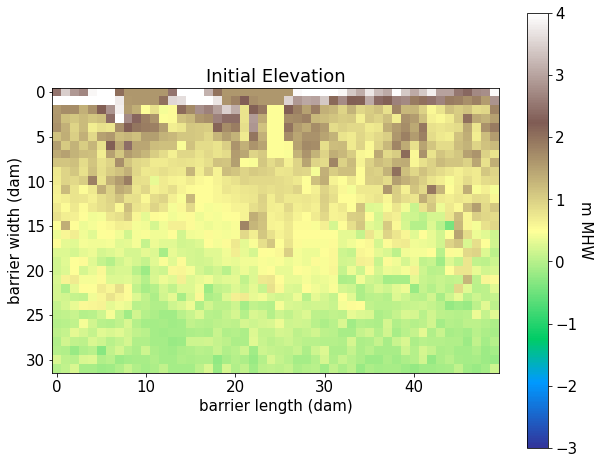

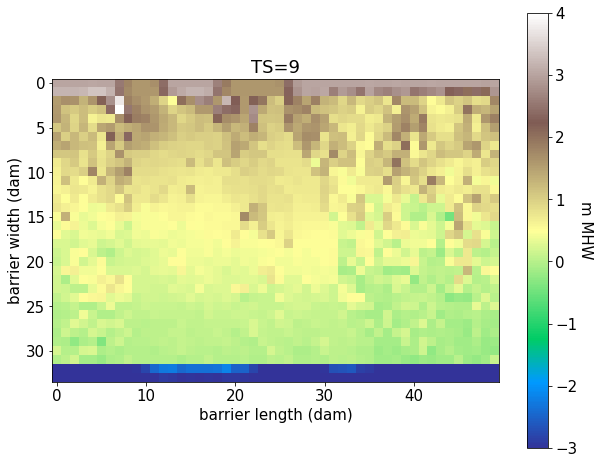

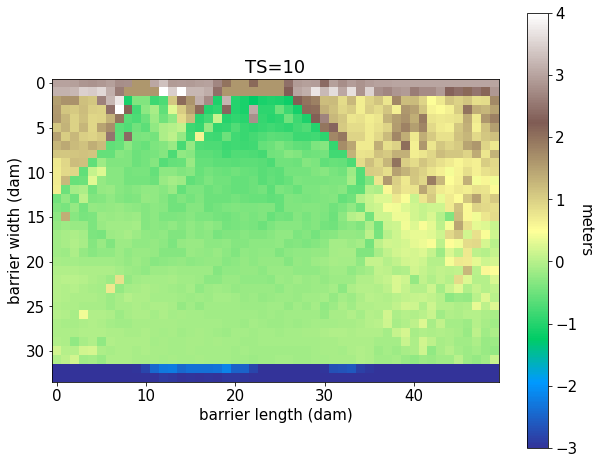

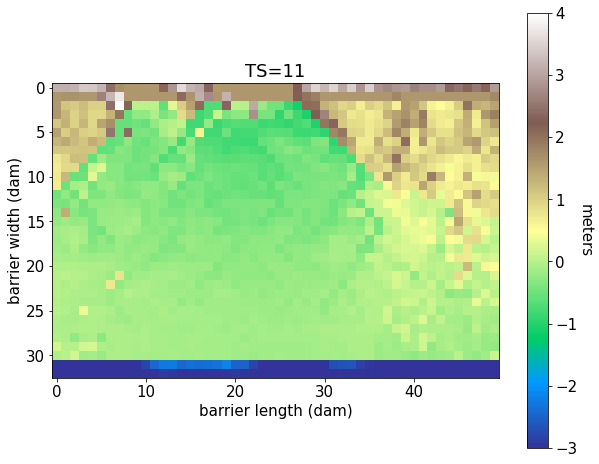

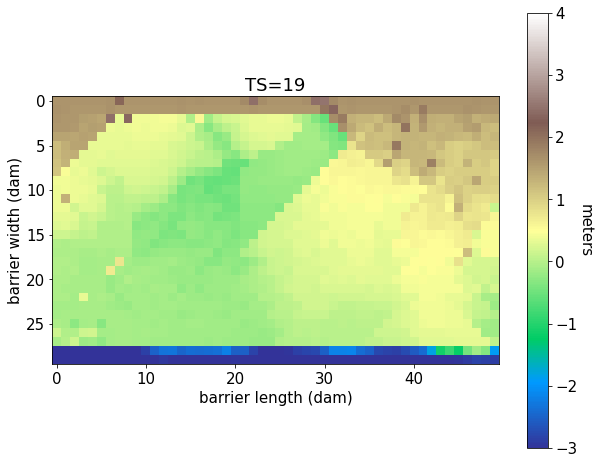

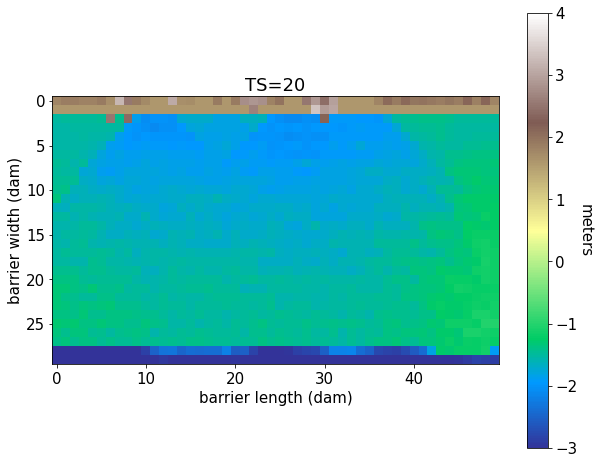

In [61]:
### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain

min_v = -3
max_v = 4

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    intial_full*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain9[:, :]*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=9")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain10*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=10")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain11*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=11")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)


fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain19*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=19")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain20*10,
    cmap="terrain",
    vmin=min_v, vmax=max_v,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=20")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)


In [65]:
full_domain10[1,:]*10

array([3.16068402, 3.17450128, 3.21569706, 3.48683075, 3.44695643,
       3.56967525, 3.14249272, 2.59603222, 1.615     , 1.615     ,
       1.615     , 1.615     , 3.98077249, 3.47531845, 4.22745071,
       3.21941304, 3.23391743, 3.10805561, 2.45672937, 1.615     ,
       1.615     , 1.615     , 1.615     , 1.615     , 1.615     ,
       1.615     , 2.2526419 , 3.02360946, 3.15208534, 3.71064006,
       3.24509209, 3.62424553, 3.05126325, 3.64869778, 2.84894473,
       3.51805471, 2.81859683, 2.69602685, 2.853324  , 2.91288959,
       2.58590128, 2.74276988, 2.76333629, 2.90674783, 2.33020792,
       2.45616351, 2.09960354, 2.49816481, 2.13451578, 2.88224862])

In [66]:
full_domain11[0,:]*10

array([3.13829086, 3.1480934 , 3.1837354 , 3.40130148, 3.39588785,
       3.1893612 , 2.4393612 , 1.6893612 , 1.611     , 1.611     ,
       1.611     , 1.611     , 2.11494421, 2.86494421, 3.61494421,
       3.18463528, 3.09273873, 2.34273873, 1.59273873, 1.611     ,
       1.611     , 1.611     , 1.611     , 1.611     , 1.611     ,
       1.611     , 1.611     , 2.27243749, 3.02243749, 3.53126274,
       3.20771219, 3.52495048, 3.04565952, 3.46632219, 2.86133194,
       3.45688798, 2.83974935, 2.73292116, 2.86412287, 2.92336803,
       2.64713978, 2.7865087 , 2.78190865, 2.91456356, 2.37691194,
       2.5232849 , 2.16551252, 2.56736643, 2.1661628 , 2.90650573])

Text(0.5, 1.0, 'Outwash to Shoreface')

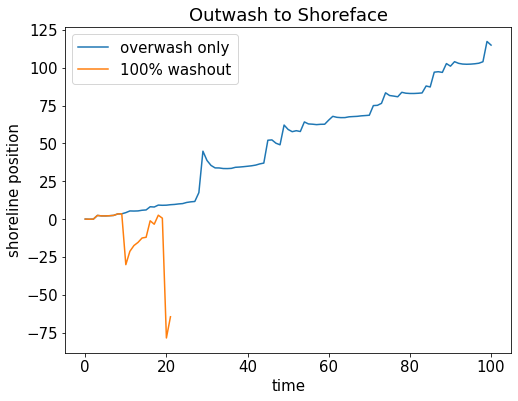

In [13]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [14]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [15]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

 Time Step:  9Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Ti

Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Ti

Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
O

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1258
Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
O

Outwasher Time Step:  229
Outwasher Time Step:  230
Outwasher Time Step:  231
Outwasher Time Step:  232
Outwasher Time Step:  233
Outwasher Time Step:  234
Outwasher Time Step:  235
Outwasher Time Step:  236
Outwasher Time Step:  237
Outwasher Time Step:  238
Outwasher Time Step:  239
Outwasher Time Step:  240
Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Time Step:  243
Outwasher Time Step:  244
Outwasher Time Step:  245
Outwasher Time Step:  246
Outwasher Time Step:  247
Outwasher Time Step:  248
Outwasher Time Step:  249
Outwasher Time Step:  250
Outwasher Time Step:  251
Outwasher Time Step:  252
Outwasher Time Step:  253
Outwasher Time Step:  254
Outwasher Time Step:  255
Outwasher Time Step:  256
Outwasher Time Step:  257
Outwasher Time Step:  258
Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Ti

Outwasher Time Step:  545
Outwasher Time Step:  546
Outwasher Time Step:  547
Outwasher Time Step:  548
Outwasher Time Step:  549
Outwasher Time Step:  550
Outwasher Time Step:  551
Outwasher Time Step:  552
Outwasher Time Step:  553
Outwasher Time Step:  554
Outwasher Time Step:  555
Outwasher Time Step:  556
Outwasher Time Step:  557
Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Time Step:  567
Outwasher Time Step:  568
Outwasher Time Step:  569
Outwasher Time Step:  570
Outwasher Time Step:  571
Outwasher Time Step:  572
Outwasher Time Step:  573
Outwasher Time Step:  574
Outwasher Time Step:  575
Outwasher Time Step:  576
Outwasher Time Step:  577
Outwasher Time Step:  578
Outwasher Time Step:  579
Outwasher Time Step:  580
Outwasher Time Step:  581
Outwasher Time Step:  582
Outwasher Ti

Outwasher Time Step:  861
Outwasher Time Step:  862
Outwasher Time Step:  863
Outwasher Time Step:  864
Outwasher Time Step:  865
Outwasher Time Step:  866
Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Ti

Outwasher Time Step:  1170
Outwasher Time Step:  1171
Outwasher Time Step:  1172
Outwasher Time Step:  1173
Outwasher Time Step:  1174
Outwasher Time Step:  1175
Outwasher Time Step:  1176
Outwasher Time Step:  1177
Outwasher Time Step:  1178
Outwasher Time Step:  1179
Outwasher Time Step:  1180
Outwasher Time Step:  1181
Outwasher Time Step:  1182
Outwasher Time Step:  1183
Outwasher Time Step:  1184
Outwasher Time Step:  1185
Outwasher Time Step:  1186
Outwasher Time Step:  1187
Outwasher Time Step:  1188
Outwasher Time Step:  1189
Outwasher Time Step:  1190
Outwasher Time Step:  1191
Outwasher Time Step:  1192
Outwasher Time Step:  1193
Outwasher Time Step:  1194
Outwasher Time Step:  1195
Outwasher Time Step:  1196
Outwasher Time Step:  1197
Outwasher Time Step:  1198
Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
O

c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Barrier has HEIGHT DROWNED at t = 31 years


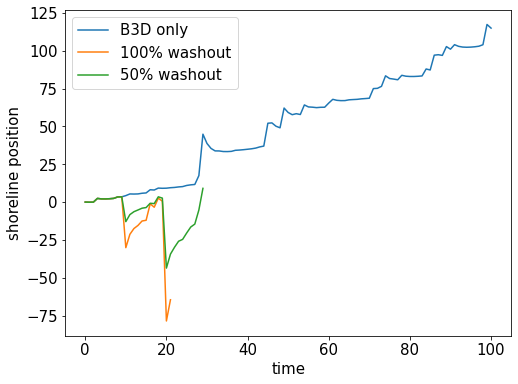

In [16]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [17]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-damMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-dam.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 12,
    ki_value=1.01E-2,
    cx=0.65
)

In [18]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

 Time Step:  9Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step: 

Outwasher Time Step:  319
Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Ti

Outwasher Time Step:  635
Outwasher Time Step:  636
Outwasher Time Step:  637
Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Ti

Outwasher Time Step:  952
Outwasher Time Step:  953
Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Ti

Outwasher Time Step:  1259
Outwasher Time Step:  1260
Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
O

C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1533: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
C:\Users\Lexi\PycharmProjects\Barrier3D\barrier3d\barrier3d.py:1535: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


 Time Step:  19Outwasher Time Step:  0
Outwasher Time Step:  1
Outwasher Time Step:  2
Outwasher Time Step:  3
Outwasher Time Step:  4
Outwasher Time Step:  5
Outwasher Time Step:  6
Outwasher Time Step:  7
Outwasher Time Step:  8
Outwasher Time Step:  9
Outwasher Time Step:  10
Outwasher Time Step:  11
Outwasher Time Step:  12
Outwasher Time Step:  13
Outwasher Time Step:  14
Outwasher Time Step:  15
Outwasher Time Step:  16
Outwasher Time Step:  17
Outwasher Time Step:  18
Outwasher Time Step:  19
Outwasher Time Step:  20
Outwasher Time Step:  21
Outwasher Time Step:  22
Outwasher Time Step:  23
Outwasher Time Step:  24
Outwasher Time Step:  25
Outwasher Time Step:  26
Outwasher Time Step:  27
Outwasher Time Step:  28
Outwasher Time Step:  29
Outwasher Time Step:  30
Outwasher Time Step:  31
Outwasher Time Step:  32
Outwasher Time Step:  33
Outwasher Time Step:  34
Outwasher Time Step:  35
Outwasher Time Step:  36
Outwasher Time Step:  37
Outwasher Time Step:  38
Outwasher Time Step:

Outwasher Time Step:  320
Outwasher Time Step:  321
Outwasher Time Step:  322
Outwasher Time Step:  323
Outwasher Time Step:  324
Outwasher Time Step:  325
Outwasher Time Step:  326
Outwasher Time Step:  327
Outwasher Time Step:  328
Outwasher Time Step:  329
Outwasher Time Step:  330
Outwasher Time Step:  331
Outwasher Time Step:  332
Outwasher Time Step:  333
Outwasher Time Step:  334
Outwasher Time Step:  335
Outwasher Time Step:  336
Outwasher Time Step:  337
Outwasher Time Step:  338
Outwasher Time Step:  339
Outwasher Time Step:  340
Outwasher Time Step:  341
Outwasher Time Step:  342
Outwasher Time Step:  343
Outwasher Time Step:  344
Outwasher Time Step:  345
Outwasher Time Step:  346
Outwasher Time Step:  347
Outwasher Time Step:  348
Outwasher Time Step:  349
Outwasher Time Step:  350
Outwasher Time Step:  351
Outwasher Time Step:  352
Outwasher Time Step:  353
Outwasher Time Step:  354
Outwasher Time Step:  355
Outwasher Time Step:  356
Outwasher Time Step:  357
Outwasher Ti

Outwasher Time Step:  638
Outwasher Time Step:  639
Outwasher Time Step:  640
Outwasher Time Step:  641
Outwasher Time Step:  642
Outwasher Time Step:  643
Outwasher Time Step:  644
Outwasher Time Step:  645
Outwasher Time Step:  646
Outwasher Time Step:  647
Outwasher Time Step:  648
Outwasher Time Step:  649
Outwasher Time Step:  650
Outwasher Time Step:  651
Outwasher Time Step:  652
Outwasher Time Step:  653
Outwasher Time Step:  654
Outwasher Time Step:  655
Outwasher Time Step:  656
Outwasher Time Step:  657
Outwasher Time Step:  658
Outwasher Time Step:  659
Outwasher Time Step:  660
Outwasher Time Step:  661
Outwasher Time Step:  662
Outwasher Time Step:  663
Outwasher Time Step:  664
Outwasher Time Step:  665
Outwasher Time Step:  666
Outwasher Time Step:  667
Outwasher Time Step:  668
Outwasher Time Step:  669
Outwasher Time Step:  670
Outwasher Time Step:  671
Outwasher Time Step:  672
Outwasher Time Step:  673
Outwasher Time Step:  674
Outwasher Time Step:  675
Outwasher Ti

Outwasher Time Step:  954
Outwasher Time Step:  955
Outwasher Time Step:  956
Outwasher Time Step:  957
Outwasher Time Step:  958
Outwasher Time Step:  959
Outwasher Time Step:  960
Outwasher Time Step:  961
Outwasher Time Step:  962
Outwasher Time Step:  963
Outwasher Time Step:  964
Outwasher Time Step:  965
Outwasher Time Step:  966
Outwasher Time Step:  967
Outwasher Time Step:  968
Outwasher Time Step:  969
Outwasher Time Step:  970
Outwasher Time Step:  971
Outwasher Time Step:  972
Outwasher Time Step:  973
Outwasher Time Step:  974
Outwasher Time Step:  975
Outwasher Time Step:  976
Outwasher Time Step:  977
Outwasher Time Step:  978
Outwasher Time Step:  979
Outwasher Time Step:  980
Outwasher Time Step:  981
Outwasher Time Step:  982
Outwasher Time Step:  983
Outwasher Time Step:  984
Outwasher Time Step:  985
Outwasher Time Step:  986
Outwasher Time Step:  987
Outwasher Time Step:  988
Outwasher Time Step:  989
Outwasher Time Step:  990
Outwasher Time Step:  991
Outwasher Ti

Outwasher Time Step:  1261
Outwasher Time Step:  1262
Outwasher Time Step:  1263
Outwasher Time Step:  1264
Outwasher Time Step:  1265
Outwasher Time Step:  1266
Outwasher Time Step:  1267
Outwasher Time Step:  1268
Outwasher Time Step:  1269
Outwasher Time Step:  1270
Outwasher Time Step:  1271
Outwasher Time Step:  1272
Outwasher Time Step:  1273
Outwasher Time Step:  1274
Outwasher Time Step:  1275
Outwasher Time Step:  1276
Outwasher Time Step:  1277
Outwasher Time Step:  1278
Outwasher Time Step:  1279
Outwasher Time Step:  1280
Outwasher Time Step:  1281
Outwasher Time Step:  1282
Outwasher Time Step:  1283
Outwasher Time Step:  1284
Outwasher Time Step:  1285
Outwasher Time Step:  1286
Outwasher Time Step:  1287
Outwasher Time Step:  1288
Outwasher Time Step:  1289
Outwasher Time Step:  1290
Outwasher Time Step:  1291
Outwasher Time Step:  1292
Outwasher Time Step:  1293
Outwasher Time Step:  1294
Outwasher Time Step:  1295
Outwasher Time Step:  1296
Outwasher Time Step:  1297
O

Outwasher Time Step:  230
Outwasher Time Step:  231
Outwasher Time Step:  232
Outwasher Time Step:  233
Outwasher Time Step:  234
Outwasher Time Step:  235
Outwasher Time Step:  236
Outwasher Time Step:  237
Outwasher Time Step:  238
Outwasher Time Step:  239
Outwasher Time Step:  240
Outwasher Time Step:  241
Outwasher Time Step:  242
Outwasher Time Step:  243
Outwasher Time Step:  244
Outwasher Time Step:  245
Outwasher Time Step:  246
Outwasher Time Step:  247
Outwasher Time Step:  248
Outwasher Time Step:  249
Outwasher Time Step:  250
Outwasher Time Step:  251
Outwasher Time Step:  252
Outwasher Time Step:  253
Outwasher Time Step:  254
Outwasher Time Step:  255
Outwasher Time Step:  256
Outwasher Time Step:  257
Outwasher Time Step:  258
Outwasher Time Step:  259
Outwasher Time Step:  260
Outwasher Time Step:  261
Outwasher Time Step:  262
Outwasher Time Step:  263
Outwasher Time Step:  264
Outwasher Time Step:  265
Outwasher Time Step:  266
Outwasher Time Step:  267
Outwasher Ti

Outwasher Time Step:  546
Outwasher Time Step:  547
Outwasher Time Step:  548
Outwasher Time Step:  549
Outwasher Time Step:  550
Outwasher Time Step:  551
Outwasher Time Step:  552
Outwasher Time Step:  553
Outwasher Time Step:  554
Outwasher Time Step:  555
Outwasher Time Step:  556
Outwasher Time Step:  557
Outwasher Time Step:  558
Outwasher Time Step:  559
Outwasher Time Step:  560
Outwasher Time Step:  561
Outwasher Time Step:  562
Outwasher Time Step:  563
Outwasher Time Step:  564
Outwasher Time Step:  565
Outwasher Time Step:  566
Outwasher Time Step:  567
Outwasher Time Step:  568
Outwasher Time Step:  569
Outwasher Time Step:  570
Outwasher Time Step:  571
Outwasher Time Step:  572
Outwasher Time Step:  573
Outwasher Time Step:  574
Outwasher Time Step:  575
Outwasher Time Step:  576
Outwasher Time Step:  577
Outwasher Time Step:  578
Outwasher Time Step:  579
Outwasher Time Step:  580
Outwasher Time Step:  581
Outwasher Time Step:  582
Outwasher Time Step:  583
Outwasher Ti

Outwasher Time Step:  862
Outwasher Time Step:  863
Outwasher Time Step:  864
Outwasher Time Step:  865
Outwasher Time Step:  866
Outwasher Time Step:  867
Outwasher Time Step:  868
Outwasher Time Step:  869
Outwasher Time Step:  870
Outwasher Time Step:  871
Outwasher Time Step:  872
Outwasher Time Step:  873
Outwasher Time Step:  874
Outwasher Time Step:  875
Outwasher Time Step:  876
Outwasher Time Step:  877
Outwasher Time Step:  878
Outwasher Time Step:  879
Outwasher Time Step:  880
Outwasher Time Step:  881
Outwasher Time Step:  882
Outwasher Time Step:  883
Outwasher Time Step:  884
Outwasher Time Step:  885
Outwasher Time Step:  886
Outwasher Time Step:  887
Outwasher Time Step:  888
Outwasher Time Step:  889
Outwasher Time Step:  890
Outwasher Time Step:  891
Outwasher Time Step:  892
Outwasher Time Step:  893
Outwasher Time Step:  894
Outwasher Time Step:  895
Outwasher Time Step:  896
Outwasher Time Step:  897
Outwasher Time Step:  898
Outwasher Time Step:  899
Outwasher Ti

Outwasher Time Step:  1171
Outwasher Time Step:  1172
Outwasher Time Step:  1173
Outwasher Time Step:  1174
Outwasher Time Step:  1175
Outwasher Time Step:  1176
Outwasher Time Step:  1177
Outwasher Time Step:  1178
Outwasher Time Step:  1179
Outwasher Time Step:  1180
Outwasher Time Step:  1181
Outwasher Time Step:  1182
Outwasher Time Step:  1183
Outwasher Time Step:  1184
Outwasher Time Step:  1185
Outwasher Time Step:  1186
Outwasher Time Step:  1187
Outwasher Time Step:  1188
Outwasher Time Step:  1189
Outwasher Time Step:  1190
Outwasher Time Step:  1191
Outwasher Time Step:  1192
Outwasher Time Step:  1193
Outwasher Time Step:  1194
Outwasher Time Step:  1195
Outwasher Time Step:  1196
Outwasher Time Step:  1197
Outwasher Time Step:  1198
Outwasher Time Step:  1199
Outwasher Time Step:  1200
Outwasher Time Step:  1201
Outwasher Time Step:  1202
Outwasher Time Step:  1203
Outwasher Time Step:  1204
Outwasher Time Step:  1205
Outwasher Time Step:  1206
Outwasher Time Step:  1207
O

c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\lexi\pycharmprojects\cascade\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 Time Step:  30Barrier has HEIGHT DROWNED at t = 31 years


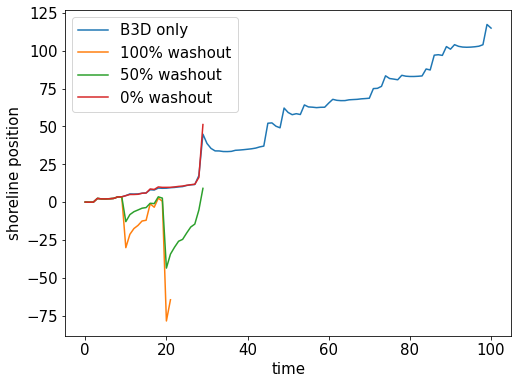

In [19]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
plt.plot(m_xsTS_0, label="0% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# plotting Qow

Text(0.5, 1.0, 'Overwash')

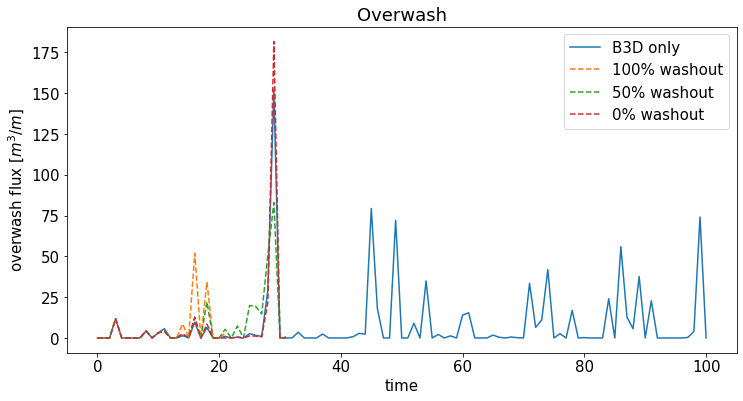

In [20]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({"font.size": 15})

plt.plot(OWTS, label="B3D only")
plt.plot(OWTS2, linestyle="dashed", label="100% washout")
plt.plot(OWTS3, linestyle="dashed", label="50% washout")
plt.plot(OWTS4, linestyle="dashed", label="0% washout")
# plt.plot(OWTS3, label="Outwash every 20 years")
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("overwash flux [$m^3/m$]")
plt.legend()
plt.title("Overwash")

In [21]:
# sfTS = b3d.s_sf_TS #m3/m
# sfTS2 = b3d2.s_sf_TS #m3/m
# sfTS3 = b3d3.s_sf_TS #m3/m

# plt.plot(sfTS2, label="B3D only")
# plt.plot(sfTS, label="Outwash every 10 years")
# plt.plot(sfTS3, label="Outwash every 20 years")

# plt.xlabel("time")
# plt.ylabel("shoreface slope")
# # plt.savefig(newpath + "shoreline_position", facecolor='w')
# plt.legend()
# # plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\overwash_comparison_substep20.png", facecolor='w')

In [22]:
# plt.rcParams['figure.figsize'] = (8,6)
# plt.rcParams.update({"font.size": 15})

# dune_min1 = []
# dune_max1 = []
# dune_avg1 = []
# dune_min2 = []
# dune_max2 = []
# dune_avg2 = []
# dune_min3 = []
# dune_max3 = []
# dune_avg3 = []

# for t in range(101):
#     # b3d only
#     sub_domain2 = b3d2._DuneDomain[t, :, :]
#     crest2 = sub_domain2.max(axis=1)
#     dune_min2.append(min(crest2))
#     dune_max2.append(max(crest2))
#     dune_avg2.append(np.mean(crest2))
#     # outwash 10 years
#     sub_domain1 = b3d._DuneDomain[t, :, :]
#     crest1 = sub_domain1.max(axis=1)
#     dune_min1.append(min(crest1))
#     dune_max1.append(max(crest1))
#     dune_avg1.append(np.mean(crest1))
#     # outwash 20 years
#     sub_domain3 = b3d3._DuneDomain[t, :, :]
#     crest3 = sub_domain3.max(axis=1)
#     dune_min3.append(min(crest3))
#     dune_max3.append(max(crest3))
#     dune_avg3.append(np.mean(crest3))

# plt.figure(1)
# plt.plot(dune_min2, label = "B3D Only")
# plt.plot(dune_min1, label="Outwash every 10 years")
# plt.plot(dune_min3, label="Outwash every 20 years")
# plt.title("min dune crest heights")
# plt.xlabel("time")
# plt.legend()

# plt.figure(2)
# plt.plot(dune_max2, label = "B3D Only")
# plt.plot(dune_max1, label="Outwash every 10 years")
# plt.plot(dune_max3, label="Outwash every 20 years")
# plt.title("max dune crest heights")
# plt.xlabel("time")
# plt.legend()

# plt.figure(3)
# plt.plot(dune_avg2, label = "B3D Only")
# plt.plot(dune_avg1, label="Outwash every 10 years")
# plt.plot(dune_avg3, label="Outwash every 20 years")
# plt.title("avg dune crest heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

In [23]:
# plt.rcParams['figure.figsize'] = (8,6)
# plt.rcParams.update({"font.size": 15})

# dune_min1 = []
# dune_max1 = []
# dune_avg1 = []
# dune_min2 = []
# dune_max2 = []
# dune_avg2 = []
# dune_min3 = []
# dune_max3 = []
# dune_avg3 = []

# for t in range(101):
#     # b3d only
#     sub_domain2 = b3d2._DuneDomain[t, :, :]
#     crest2 = sub_domain2[:,0]
#     dune_min2.append(min(crest2))
#     dune_max2.append(max(crest2))
#     dune_avg2.append(np.mean(crest2))
#     # outwash 10 years
#     sub_domain1 = b3d._DuneDomain[t, :, :]
#     crest1 = sub_domain1[:,0]
#     dune_min1.append(min(crest1))
#     dune_max1.append(max(crest1))
#     dune_avg1.append(np.mean(crest1))
#     # outwash 20 years
#     sub_domain3 = b3d3._DuneDomain[t, :, :]
#     crest3 = sub_domain3[:,0]
#     dune_min3.append(min(crest3))
#     dune_max3.append(max(crest3))
#     dune_avg3.append(np.mean(crest3))

# plt.figure(1)
# plt.plot(dune_min2, label = "B3D Only")
# plt.plot(dune_min1, label="Outwash every 10 years")
# plt.plot(dune_min3, label="Outwash every 20 years")
# plt.title("min dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

# plt.figure(2)
# plt.plot(dune_max2, label = "B3D Only")
# plt.plot(dune_max1, label="Outwash every 10 years")
# plt.plot(dune_max3, label="Outwash every 20 years")
# plt.title("max dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

# plt.figure(3)
# plt.plot(dune_avg2, label = "B3D Only")
# plt.plot(dune_avg1, label="Outwash every 10 years")
# plt.plot(dune_avg3, label="Outwash every 20 years")
# plt.title("avg dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

In [24]:
# initial_dunes = np.multiply(np.transpose(b3d.DuneDomain[0]+b3d._BermEl),10)
# final_dunes = np.multiply(np.transpose(b3d.DuneDomain[100]+b3d._BermEl),10)
# initial_domain = np.multiply(b3d.DomainTS[0],10)
# final_domain = np.multiply(b3d.DomainTS[100],10)

# full_initial_domain = np.append(initial_dunes, initial_domain, 0)
# full_final_domain = np.flip(np.append(final_dunes, final_domain, 0),0)

# b3d_initial_domain = np.append(np.multiply(np.transpose(b3d2.DuneDomain[100]+b3d2._BermEl),10), np.multiply(b3d2.DomainTS[100],10), 0)
# b3d_final_domain = np.flip(np.append(np.multiply(np.transpose(b3d2.DuneDomain[100]+b3d2._BermEl),10), np.multiply(b3d2.DomainTS[100],10), 0),0)


In [25]:
# ### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# # plotting initial domain
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     full_initial_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# # plotting post storm elevation
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_final_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Final Elevation")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')

In [26]:
# ### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# # plotting initial domain
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     b3d_initial_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# # plotting post storm elevation
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     b3d_final_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Final Elevation")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')